In [90]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
driver = '{ODBC Driver 17 for SQL Server}'
server = '190.117.102.109,1433'  # Incluir el puerto en la dirección del servidor
database = 'siiaexplorandes'
usuario = 'consulta'
password = 'consultagerencia'
 
conexion = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={usuario};PWD={password}')

# Carga tablas de Cobrado

### Universo de Files

In [92]:
tabla_files = """SELECT DISTINCT a.fil_codigo,fil_g_f,SUBSTRING(a.fil_codigo,1,4) año_file,SUBSTRING(a.fil_codigo,5,2) mes_file,a.anula AS "Anulado",fil_grupo,age_nombre,fil_valorc,invoice,e.cobrado,
sum(case when ser_moneda='D' then mit_cprog else mit_cprog/3.1 end) costeado_total_usd,
fil_pax,ven_nombre,fil_fecha,YEAR(fil_fecha) año_creacion,MONTH(fil_fecha) mes_creacion,fil_dia,
CASE  WHEN fil_grupo LIKE '%VOID%' THEN '2' 
    when anula='1' then '2'
     WHEN fil_grupo LIKE '%DUPLICADO%' THEN '1' 
     WHEN fil_grupo LIKE 'DUPLICIDAD%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF ANCASCOCHA%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF AUSANGATE%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF CHOQUEQUIRAO%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF HIDDEN%' THEN '1'
     WHEN fil_grupo LIKE '%SSFF INCA TRAIL%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF INCATRAIL%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF IT EXPRESS%' THEN '1'
     WHEN fil_grupo LIKE '%SSFF NEW SALKANTAY%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF SALKAN%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF SALKA%' THEN '1'
     WHEN fil_grupo LIKE 'SSFF SALKANTAY%' THEN '1'
     WHEN fil_grupo LIKE 'SSFFNEW%' THEN '1'
    WHEN fil_grupo LIKE 'SSFF TREK%' THEN '1'
    WHEN fil_grupo LIKE ' SSFF INCA TRAIL%' THEN '1'
    WHEN fil_grupo LIKE ' SSFF INCATRAIL%' THEN '1'
    WHEN fil_grupo LIKE '%SSFF CORDILLERA%' THEN '1'
    WHEN fil_grupo LIKE '%SSFF NEW SALKA%' THEN '1' 
	 when fil_grupo LIKE '%SSFF HUAYHUASH%' THEN '1' END AS 'SSFF/VOID',
CASE when fil_grupo LIKE '%VOID%' THEN 'Cancelado'
	  when fil_grupo LIKE '%POST %'THEN 'Postergado con file'
	  when fil_grupo LIKE '%POSTPONE%' THEN 'Postergado sin file'
	  WHEN Fil_grupo LIKE '%- RB%' THEN 'Rebooked' ELSE 'New Booking' END AS 'ESTADO FILE',fil_g_f,fil_fllega
FROM dbo.o_filedeta a
LEFT JOIN dbo.o_agencias b ON a.age_codigo=b.age_codigo
LEFT JOIN dbo.t_vendedor c ON a.ven_codigo=c.ven_codigo
LEFT JOIN (SELECT FIL_CODIGO,SUM(ROU) INVOICE FROM (SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2019
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO
UNION ALL
SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2020
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO
UNION ALL
SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2024
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO
UNION ALL
SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2022
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO
union all
SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2021
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO
UNION ALL
SELECT fil_codigo,SUM(CASE WHEN gui_coddoc='IN' THEN rou_submon ELSE -rou_submon END) ROU
FROM dbo.guic2023
WHERE PLA_CUENTA='' and gui_serie<>'' and elimini='0' and gui_coddoc<>''
GROUP BY FIL_CODIGO)T
GROUP BY FIL_CODIGO) D ON A.FIL_CODIGO=D.FIL_CODIGO
left join (select distinct sum(ing_asigna) cobrado,fil_codigo  
from dbo.o_filepago 
group by fil_codigo) as e on a.fil_codigo=e.fil_codigo
WHERE SUBSTRING(a.fil_codigo,1,4)>='2024' AND a.elimini='0' and fil_g_f<>'' AND FIL_GRUPO NOT LIKE '%VOID%' AND ANULA='0' AND FIL_GRUPO NOT LIKE '%EXCEDENT%'
GROUP BY fil_grupo,age_nombre,fil_valorc,invoice,e.cobrado,
fil_pax,ven_nombre,fil_fecha,a.fil_codigo,fil_g_f,fil_fllega,a.anula,fil_anumot,fil_anuobs,fil_anufil,fil_anufec,fil_dia"""

In [93]:
files = pd.read_sql(tabla_files, conexion)
files['fil_codigo'] = files['fil_codigo'].str.split().str[0]
pd.set_option('display.max_columns', None)
files.dtypes

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3840\2769698055.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  files = pd.read_sql(tabla_files, conexion)


fil_codigo                    object
fil_g_f                       object
año_file                      object
mes_file                      object
Anulado                      float64
fil_grupo                     object
age_nombre                    object
fil_valorc                   float64
invoice                      float64
cobrado                      float64
costeado_total_usd           float64
fil_pax                      float64
ven_nombre                    object
fil_fecha             datetime64[ns]
año_creacion                   int64
mes_creacion                   int64
fil_dia                      float64
SSFF/VOID                     object
ESTADO FILE                   object
fil_g_f                       object
fil_fllega            datetime64[ns]
dtype: object

In [94]:
duplicados = files[files.duplicated(['fil_codigo'], keep = False )]
duplicados

,fil_codigo,fil_g_f,año_file,mes_file,Anulado,fil_grupo,age_nombre,fil_valorc,invoice,cobrado,costeado_total_usd,fil_pax,ven_nombre,fil_fecha,año_creacion,mes_creacion,fil_dia,SSFF/VOID,ESTADO FILE,fil_g_f,fil_fllega
234,202408003,S,2024,08,0.0,MP 08-24-24 X02 ...,NATURAL HABITAT ADVENTURES,6514.0,7880.0,7880.0,4593.371590,2.0,VICKY BURBANK,2023-08-31,2023,8,6.0,None,New Booking,S,2024-08-24
323,202408003,S,2024,08,0.0,MP 08-24-24 X02 ...,NATURAL HABITAT ADVENTURES,6514.0,7880.0,7880.0,912.684514,2.0,VICKY BURBANK,2023-08-31,2023,8,6.0,None,New Booking,S,2024-08-24


In [96]:
agrupado_file = files.groupby(['fil_codigo','ven_nombre','fil_dia'])[['fil_valorc','invoice','cobrado','costeado_total_usd']].sum().reset_index()
agrupado_file.head()

,fil_codigo,ven_nombre,fil_dia,fil_valorc,invoice,cobrado,costeado_total_usd
0,202401001,VICKY BURBANK,6.0,7682.0,7590.0,7590.0,5352.995787
1,202401002,VICKY BURBANK,6.0,23608.0,24278.0,24278.0,14934.789652
2,202401002A,VICKY BURBANK,1.0,666.0,0.0,0.0,491.780645
3,202401003,VICKY BURBANK,6.0,7210.0,7210.0,7210.0,4928.947721
4,202401004,VICKY BURBANK,6.0,7744.0,7744.0,7744.0,5652.099009


### Detalle de PIs

In [43]:
detalle_pi = """SELECT mov_compro,tie_razon,substring(fil_codigo,1,4) 'Año',substring(fil_codigo,5,2) 'Mes',fil_Codigo,mov_fecha 'Fecha Creac_PI',mov_fvenc 'Venc_PI',gui_docum,(replace(gui_Serie,' ','')+'-'+replace(gui_docum,' ','')) AS 'Proforma',gui_coddoc 'Tipo_PI',
sum(CASE WHEN GUI_CODDOC LIKE '%CN%' THEN -rou_submon ELSE rou_submon end) as 'Monto_PI',
CASE WHEN elimini='0' THEN 'Activo' ELSE 'Eliminado' end AS 'Estado PI'  
FROM dbo.guic2024
WHERE SUBSTRING(fil_Codigo,1,4)='2024' and (gui_coddoc<>'' OR gui_coddoc NOT LIKE '%CN%') AND ELIMINI='0' and gui_docum<>''
group by mov_compro,fil_codigo,mov_fecha,mov_fvenc,gui_coddoc,gui_serie,gui_docum,elimini,tie_razon
UNION ALL
SELECT mov_compro,tie_razon,substring(fil_codigo,1,4) 'Año',substring(fil_codigo,5,2) 'Mes',fil_Codigo,mov_fecha 'Fecha Creac_PI',mov_fvenc 'Venc_PI',gui_docum,(replace(gui_Serie,' ','')+'-'+replace(gui_docum,' ','')) AS 'Proforma',gui_coddoc 'Tipo_PI',
sum(CASE WHEN GUI_CODDOC LIKE '%CN%' THEN -rou_submon ELSE rou_submon end) as 'Monto_PI',
CASE WHEN elimini='0' THEN 'Activo' ELSE 'Eliminado' end AS 'Estado PI'  
FROM dbo.guic2023
WHERE SUBSTRING(fil_Codigo,1,4)='2024' and (gui_coddoc<>'' OR gui_coddoc NOT LIKE '%CN%') AND ELIMINI='0' and gui_docum<>''
group by mov_compro,fil_codigo,mov_fecha,mov_fvenc,gui_coddoc,gui_serie,gui_docum,elimini,tie_razon"""

detalle_pi = pd.read_sql(detalle_pi, conexion)
detalle_pi['fil_Codigo'] = detalle_pi['fil_Codigo'].str.split().str[0]
detalle_pi.head()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3840\756486468.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detalle_pi = pd.read_sql(detalle_pi, conexion)


,mov_compro,tie_razon,Año,Mes,fil_Codigo,Fecha Creac_PI,Venc_PI,gui_docum,Proforma,Tipo_PI,Monto_PI,Estado PI
0,00000000002,O'TOOLE x2 ...,2024,01,202401037,2024-01-03,2024-01-09,0003910,IN01-0003910,IN,9254.0,Activo
1,00000000003,PRINCE x 2 ...,2024,07,202407044,2024-01-03,2024-06-07,0003911,IN01-0003911,IN,8542.0,Activo
2,00000000004,HARPER x 5 ...,2024,07,202407045,2024-01-03,2024-06-12,0003912,IN01-0003912,IN,13523.0,Activo
3,00000000005,PRE-PAYMENTS 2024 ...,2024,01,202401039,2024-01-03,2023-12-11,0003913,IN01-0003913,IN,6680.0,Activo
4,00000000007,MINI TRIP CUSCO - SEPTEMBER x08 ...,2024,09,202409044,2024-01-04,2024-08-08,0003914,IN01-0003914,IN,12696.0,Activo


In [30]:
agrupado = detalle_pi.groupby(['Mes','fil_Codigo'])['Monto_PI'].sum().reset_index()
agrupado = agrupado[agrupado['Monto_PI']  > 0]
agrupado.head()

,Mes,fil_Codigo,Monto_PI
0,01,202401001,7590.0
1,01,202401002,24278.0
2,01,202401003,7210.0
3,01,202401004,7744.0
4,01,202401005,6102.0


In [31]:
tabla1 = agrupado.groupby(['Mes','fil_Codigo'])['Monto_PI'].sum().reset_index()
# tabla1 = tabla1[tabla1['Mes'] == '12']
tabla1

,Mes,fil_Codigo,Monto_PI
0,01,202401001,7590.0
1,01,202401002,24278.0
2,01,202401003,7210.0
3,01,202401004,7744.0
4,01,202401005,6102.0
...,...,...,...
495,12,202412032,14230.0
496,12,202412033,2500.0
497,12,202412034,18591.0
498,12,202412036,27730.0


In [32]:
media = agrupado.groupby('Mes')['Monto_PI'].mean().reset_index()
media

,Mes,Monto_PI
0,01,7998.300000
1,02,13164.570000
2,03,12147.180000
3,04,11277.649123
4,05,13258.604359
5,06,13094.563636
6,07,9794.119048
7,08,11150.475000
8,09,12348.507119
9,10,12960.903390


In [33]:
moda = agrupado.groupby('Mes')['Monto_PI'].apply(lambda x: x.mode().iloc[0]).reset_index()
moda

,Mes,Monto_PI
0,01,1460.0
1,02,1252.0
2,03,116.0
3,04,81.0
4,05,364.0
5,06,142.0
6,07,18.0
7,08,265.0
8,09,35.0
9,10,470.0


In [34]:
mediana = agrupado.groupby('Mes')['Monto_PI'].median().reset_index()
mediana

,Mes,Monto_PI
0,01,6809.0
1,02,7488.0
2,03,8544.0
3,04,9708.0
4,05,10861.0
5,06,8819.0
6,07,8166.0
7,08,7330.0
8,09,11368.0
9,10,9009.3


In [35]:
comparacion = pd.merge(media, moda , on = 'Mes' , suffixes=('_media', '_moda'))
comparacion_final = pd.merge(comparacion, mediana, on ='Mes', suffixes=('', '_mediana'))
comparacion_final


,Mes,Monto_PI_media,Monto_PI_moda,Monto_PI
0,01,7998.300000,1460.0,6809.0
1,02,13164.570000,1252.0,7488.0
2,03,12147.180000,116.0,8544.0
3,04,11277.649123,81.0,9708.0
4,05,13258.604359,364.0,10861.0
5,06,13094.563636,142.0,8819.0
6,07,9794.119048,18.0,8166.0
7,08,11150.475000,265.0,7330.0
8,09,12348.507119,35.0,11368.0
9,10,12960.903390,470.0,9009.3


<function matplotlib.pyplot.show(close=None, block=None)>

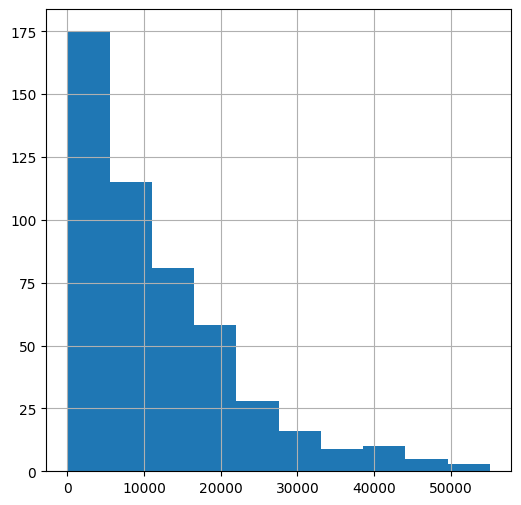

In [36]:
agrupado['Monto_PI'].hist(figsize= (6,6))
plt.show

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3840\589783166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agrupado['Monto_PI'])


<Axes: xlabel='Monto_PI', ylabel='Density'>

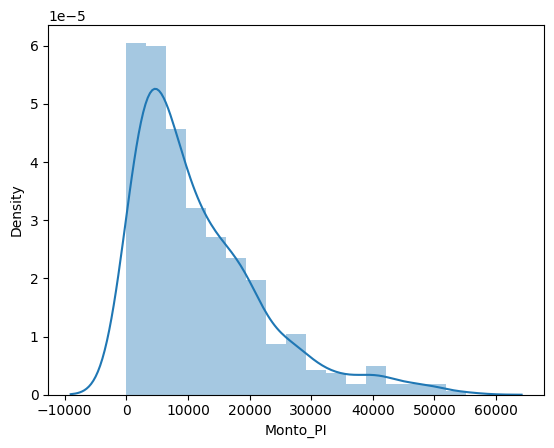

In [39]:
sns.distplot(agrupado['Monto_PI'])

In [40]:
mean = agrupado['Monto_PI'].mean()
median = agrupado['Monto_PI'].median()
mode = agrupado['Monto_PI'].mode()
skew = agrupado['Monto_PI'].skew()
kurt = agrupado['Monto_PI'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 11802.84164
La mediana es: 8571.0
La moda es: 0    3280.0
Name: Monto_PI, dtype: float64
El sesgo es: 1.4311640213847046
La kurtosis es: 2.051693780396677


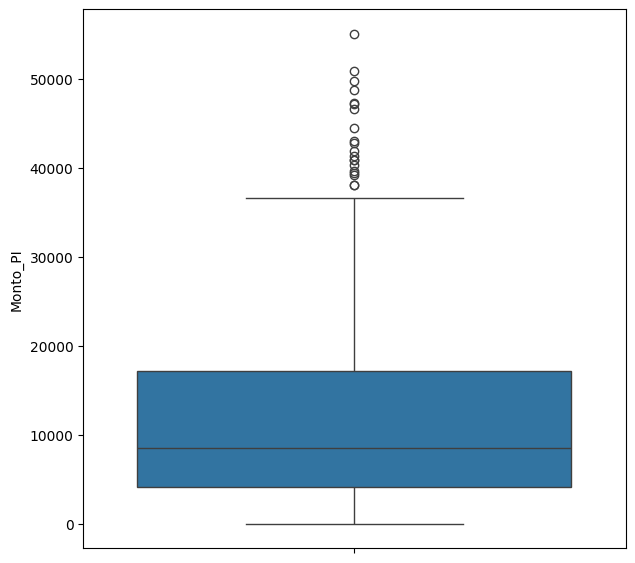

In [45]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(y=agrupado['Monto_PI'])
plt.show()

In [46]:
min = agrupado['Monto_PI'].min()
max = agrupado['Monto_PI'].max()
median = agrupado['Monto_PI'].median()
quantile = agrupado['Monto_PI'].quantile([0.25,0.5,0.75])
print("El mínimo es:", min)
print("El máximo es:", max)
print("La mediana es:", median)
print("Los cuartiles son:", quantile)

El mínimo es: 15.0
El máximo es: 55088.0
La mediana es: 8571.0
Los cuartiles son: 0.25     4115.25
0.50     8571.00
0.75    17170.25
Name: Monto_PI, dtype: float64


### 

### Tabla de Almacen